<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 8.2: Boosting

INSTRUCTIONS:

- Read the guides and hints then create the necessary analysis and code to find an answer and conclusion for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.9429
    - **ROC AUC**  = 0.9333
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ than **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory, laborious, iterative and interactive process. It is part of the process to repeat, review and change when finding a dead-end.

## Scenario: Predicting Breast Cancer
The dataset you are going to be using for this laboratory is popularly known as the **Wisconsin Breast Cancer** dataset. The task related to it is Classification.

The dataset contains a total number of _10_ features labelled in either **benign** or **malignant** classes. The features have _699_ instances out of which _16_ feature values are missing. The dataset only contains numeric values.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Wisconsin Breast Cancer DataSet
- **Citation Request**

    This breast cancer databases was obtained from the **University of Wisconsin Hospitals**, **Madison** from **Dr. William H. Wolberg**. If you publish results when using this database, then please include this information in your acknowledgements.

- **Title**

    Wisconsin Breast Cancer Database (January 8, 1991)

- **Sources**
    - **Creator**
            Dr. William H. Wolberg (physician)
            University of Wisconsin Hospitals
            Madison, Wisconsin
            USA
    - **Donor**
            Olvi Mangasarian (mangasarian@cs.wisc.edu)
            Received by David W. Aha (aha@cs.jhu.edu)
    - **Date**
            15 July 1992
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

from sklearn import model_selection
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostClassifier

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [2]:
columns = ['Sample code number',  
            'Clump Thickness',
            'Uniformity of Cell Size',       
            'Uniformity of Cell Shape',      
            'Marginal Adhesion',             
            'Single Epithelial Cell Size',   
            'Bare Nuclei',                   
            'Bland Chromatin',               
            'Normal Nucleoli',               
            'Mitoses',                       
            'Class',]

In [3]:
data = pd.read_csv('breast-cancer-wisconsin.data', na_values='?', names = columns)

# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or expurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent absence of data)

In [4]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


In [5]:
data.drop(columns = 'Sample code number', inplace=True)

In [6]:
data.shape

(699, 10)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              699 non-null    int64  
 1   Uniformity of Cell Size      699 non-null    int64  
 2   Uniformity of Cell Shape     699 non-null    int64  
 3   Marginal Adhesion            699 non-null    int64  
 4   Single Epithelial Cell Size  699 non-null    int64  
 5   Bare Nuclei                  683 non-null    float64
 6   Bland Chromatin              699 non-null    int64  
 7   Normal Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Clump Thickness,699.0,4.417740,2.815741,1.0,2.0,4.0,6.0,10.0
Uniformity of Cell Size,699.0,3.134478,3.051459,1.0,1.0,1.0,5.0,10.0
Uniformity of Cell Shape,699.0,3.207439,2.971913,1.0,1.0,1.0,5.0,10.0
Marginal Adhesion,699.0,2.806867,2.855379,1.0,1.0,1.0,4.0,10.0
Single Epithelial Cell Size,699.0,3.216023,2.214300,1.0,2.0,2.0,4.0,10.0
Bare Nuclei,683.0,3.544656,3.643857,1.0,1.0,1.0,6.0,10.0
Bland Chromatin,699.0,3.437768,2.438364,1.0,2.0,3.0,5.0,10.0
Normal Nucleoli,699.0,2.866953,3.053634,1.0,1.0,1.0,4.0,10.0
Mitoses,699.0,1.589413,1.715078,1.0,1.0,1.0,1.0,10.0
Class,699.0,2.689557,0.951273,2.0,2.0,2.0,4.0,4.0


# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engeneer** (if useful or necessary)

In [9]:
data.isnull().sum()

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [10]:
corr = data.corr()

<ipython-input-11-4b3a8f3fe542>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<AxesSubplot:>

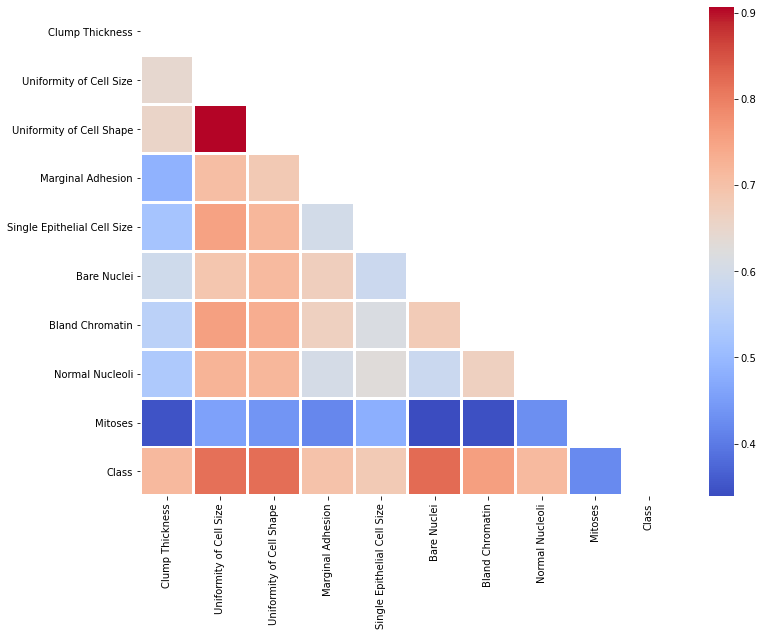

In [11]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(12, 9))
sns.heatmap(corr, mask = mask, linewidths=2, cmap='coolwarm')

In [12]:
imputer = SimpleImputer()

data.loc[:,'Bare Nuclei'] = imputer.fit_transform(data[['Bare Nuclei']])

In [13]:
data['Bare Nuclei'].isnull().sum()

0

In [14]:
x = data.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
data_n = pd.DataFrame(x_scaled, columns=data.columns)

In [15]:
data_n.sample(5)

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
307,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.222222,0.0,0.0,0.0
537,0.444444,0.000000,0.111111,0.000000,0.111111,0.000000,0.222222,0.0,0.0,0.0
54,1.000000,0.444444,0.444444,0.555556,0.777778,0.777778,0.666667,0.0,0.0,1.0
612,0.777778,1.000000,1.000000,1.000000,0.555556,1.000000,1.000000,1.0,1.0,1.0
429,0.111111,0.000000,0.000000,0.000000,0.111111,0.000000,0.111111,0.0,0.0,0.0


C:\Users\matt\.conda\envs\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\matt\.conda\envs\Python 38\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\matt\.conda\envs\Python 38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or mi

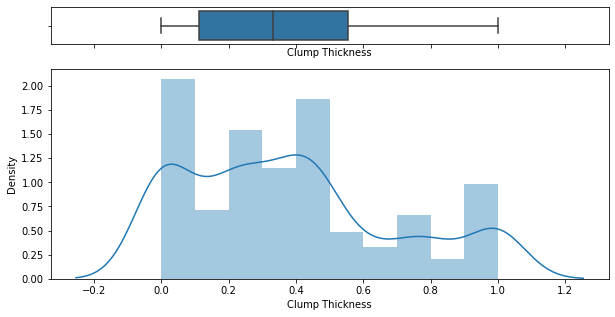

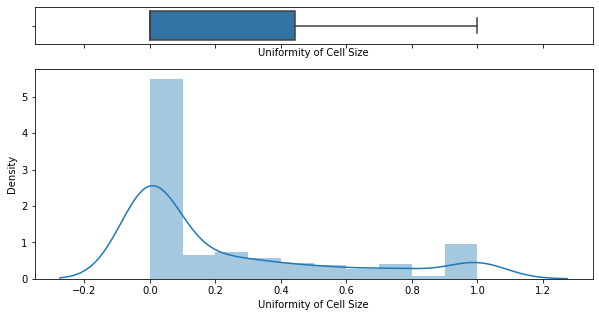

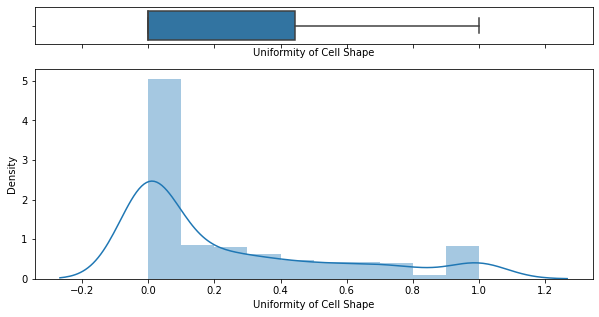

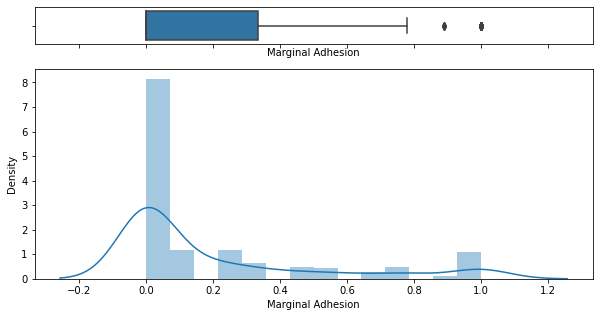

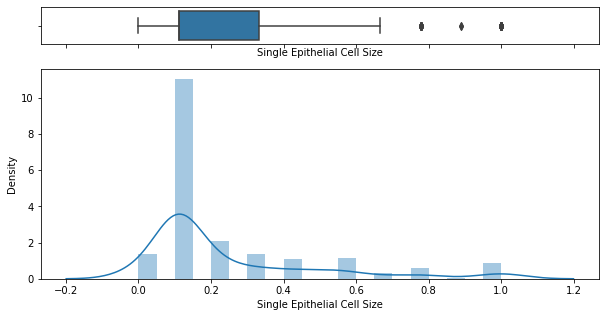

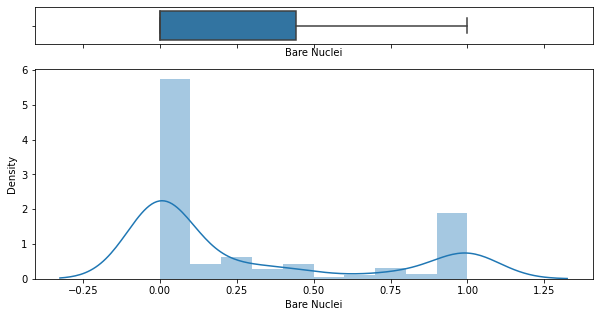

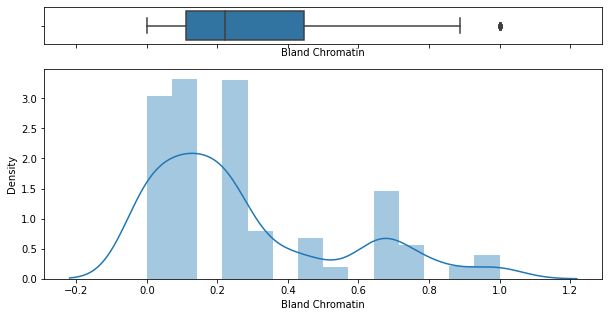

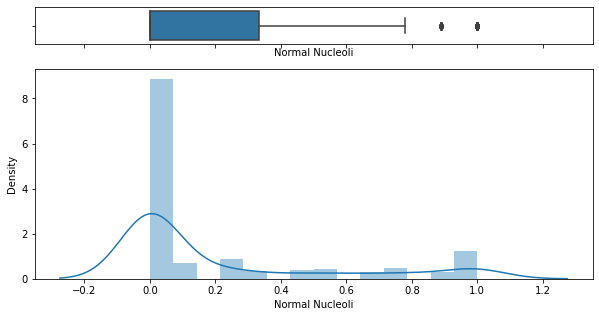

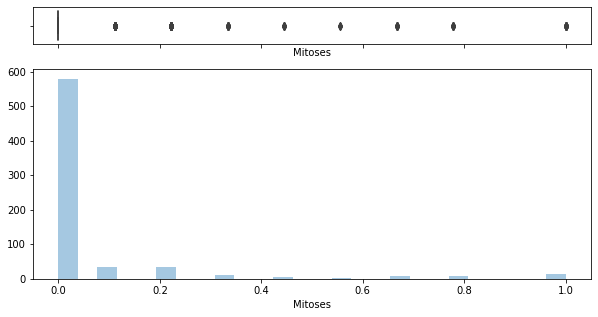

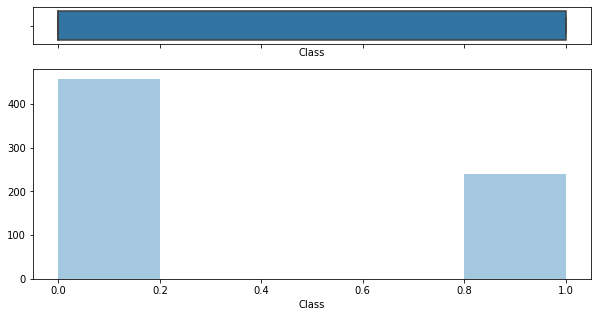

In [16]:
for c in data_n.columns:
    fig, ax = plt.subplots(2, figsize = (10,5), sharex = True, gridspec_kw = {'height_ratios':(0.15, 0.85)})
    
    ax_box = ax[0]
    ax_box = sns.boxplot(data_n[c], ax = ax_box)
    
    ax_hist = ax[1]
    if c not in ['Mitoses', 'Class']:
        ax_hist = sns.distplot(data_n[c], ax = ax_hist)
    else:
        ax_hist = sns.distplot(data_n[c], ax=ax_hist, kde=False)

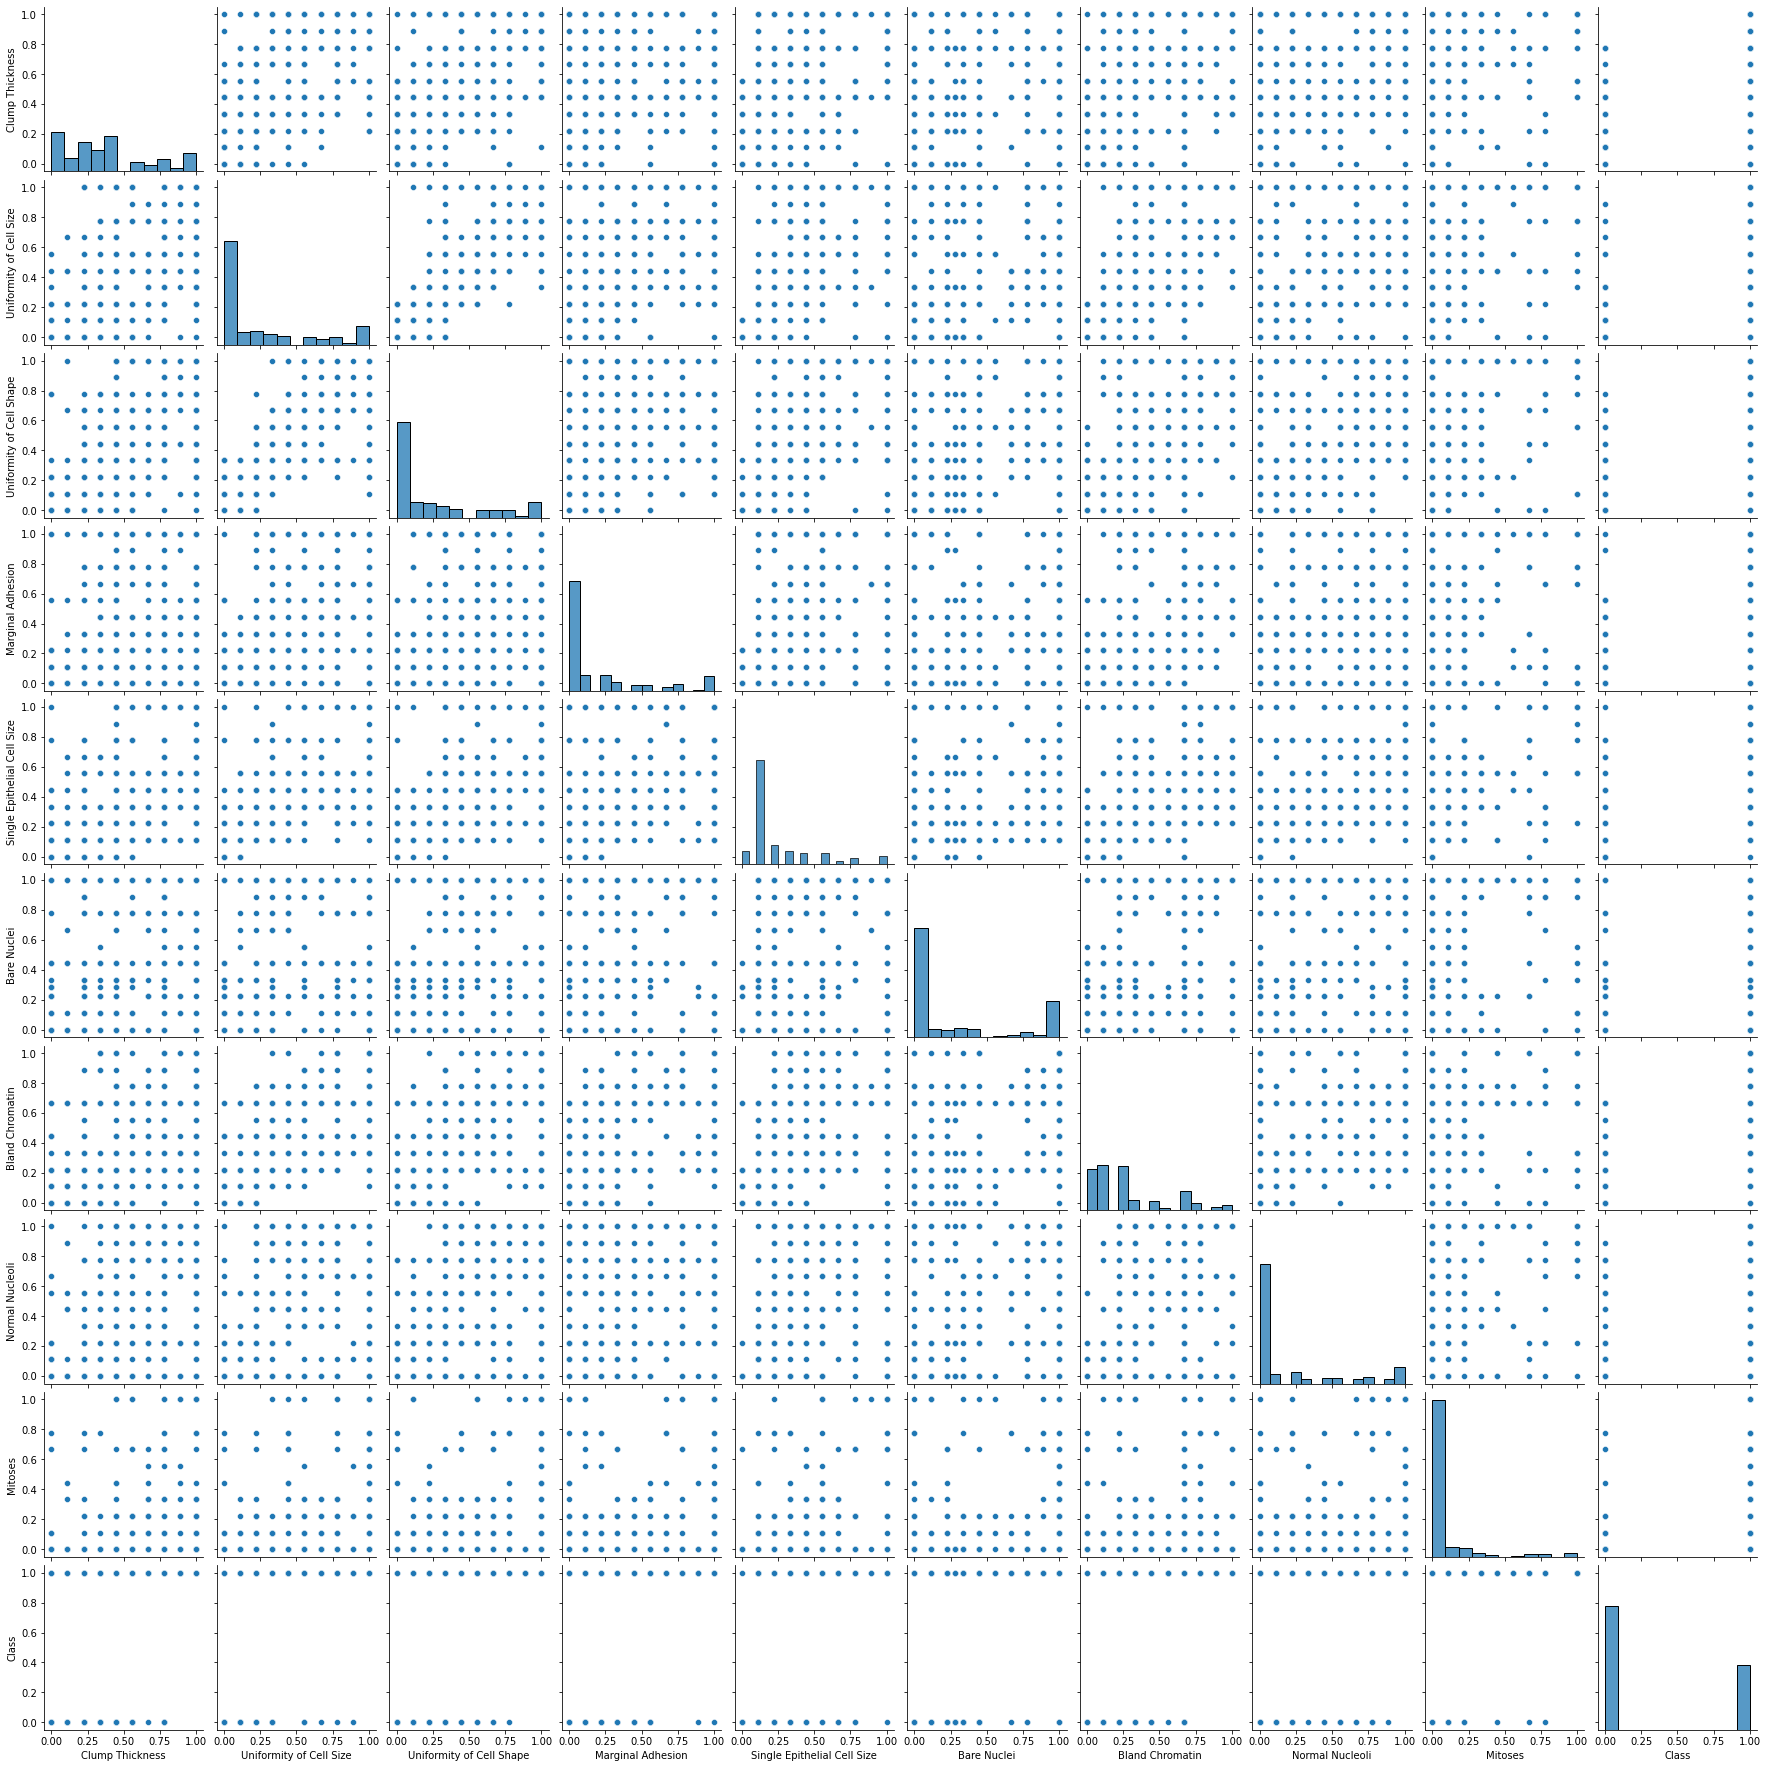

In [17]:
sns.pairplot(data_n)
plt.show()

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)? Class
- If there is an output variable:
    - What is it? 
    1 or 0 to signify cancerous or benign cells
    - What is its type? 
    numerical
- What type of Modelling is it?
    - [x] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [x] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

In [18]:
data_n.dtypes

Clump Thickness                float64
Uniformity of Cell Size        float64
Uniformity of Cell Shape       float64
Marginal Adhesion              float64
Single Epithelial Cell Size    float64
Bare Nuclei                    float64
Bland Chromatin                float64
Normal Nucleoli                float64
Mitoses                        float64
Class                          float64
dtype: object

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when spliting

In [19]:
features = columns[1:-1]
outcome = 'Class'

X = data_n[features].copy()
y = data_n[outcome].copy()

In [20]:
test_size = 0.3

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state = 50, stratify = y)

# Step 8: Define and Fit Models

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

Use only Decision Trees

In [21]:
kfold = KFold(n_splits = 10, random_state = 7, shuffle = True)
dtclf = DecisionTreeClassifier()
dtclf.fit(X_train, y_train)
results = cross_val_score(dtclf, X_train, y_train, cv = kfold)
print('Decision Tree Classifier, Cross-Validation mean: %.4f' % results.mean())

Decision Tree Classifier, Cross-Validation mean: 0.9223


In [22]:
seed = 7
num_trees = 70
abclf = AdaBoostClassifier(n_estimators = num_trees, random_state = seed)
abclf.fit(X_train, y_train)
results = cross_val_score(abclf, X_train, y_train, cv = kfold)
print('Ada Boost Classifier, Cross-Validation mean: %.4f' % results.mean())

Ada Boost Classifier, Cross-Validation mean: 0.9468


# Step 9: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [23]:
def show_summary_report(actual, prediction, probabilities):
    
    if isinstance(actual, pd.Series):
        actual = actual.values
    if actual.dtype.name == 'object':
        actual = actual.astype(int)
    if prediction.dtype.name == 'object':
        prediction = prediction.astype(int)
        
    accuracy_ = accuracy_score(actual, prediction)
    precision_ = precision_score(actual, prediction)
    recall_ = recall_score(actual, prediction)
    roc_auc_ = roc_auc_score(actual, probabilities[:, -1])
    
    print('Accuracy :  %.4f [TP/N]           Proportion of predicted labels that match the true labels.' % accuracy_)
    print('Precision : %.4f [TP / (TP + FP)] Not to label a false positive.' % precision_)
    print('Recall :    %.4f [TP / (TP + FN)] All of the positive samples.' % recall_)
    print('ROC AUC : % .4f                   How well the model learns.' % roc_auc_)
    
    mat = confusion_matrix(actual, prediction)
    
    precision, recall, _ = precision_recall_curve(actual, prediction)
    average_precision = average_precision_score(actual, prediction)
    
    fpr, tpr, _ = roc_curve(actual, probabilities[:, 1])
    roc_auc = auc(fpr, tpr)
    
    fig, ax = plt.subplots(1, 3, figsize = (18,6))
    fig.subplots_adjust(left = 0.02, right = 0.98, wspace = 0.2)
    
    sns.heatmap(mat.T, square = True, annot = True, fmt = 'd', cbar = False, cmap = 'Blues', ax = ax[0])
    
    ax[0].set_title('Confusion Matrix')
    ax[0].set_xlabel('True Label')
    ax[0].set_ylabel('Predicted Label')
    
      # Precision/Recall
    step_kwargs = {'step': 'post'}
    ax[1].step(recall, precision, color = 'b', alpha = 0.2, where = 'post')
    ax[1].fill_between(recall, precision, alpha = 0.2, color = 'b', **step_kwargs)
    ax[1].set_ylim([0.0, 1.0])
    ax[1].set_xlim([0.0, 1.0])
    ax[1].set_xlabel('Recall')
    ax[1].set_ylabel('Precision')
    ax[1].set_title('2-class Precision-Recall curve')

    # ROC
    ax[2].plot(fpr, tpr, color = 'darkorange', lw = 2, label = 'ROC curve (AUC = %0.2f)' % roc_auc)
    ax[2].plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
    ax[2].set_xlim([0.0, 1.0])
    ax[2].set_ylim([0.0, 1.0])
    ax[2].set_xlabel('False Positive Rate')
    ax[2].set_ylabel('True Positive Rate')
    ax[2].set_title('Receiver Operating Characteristic')
    ax[2].legend(loc = 'lower right')

    plt.show()
    
    return (accuracy_, precision_, recall_, roc_auc_)

*****************
* Decision Tree *
*****************
Accuracy :  1.0000 [TP/N]           Proportion of predicted labels that match the true labels.
Precision : 1.0000 [TP / (TP + FP)] Not to label a false positive.
Recall :    1.0000 [TP / (TP + FN)] All of the positive samples.
ROC AUC :  1.0000                   How well the model learns.


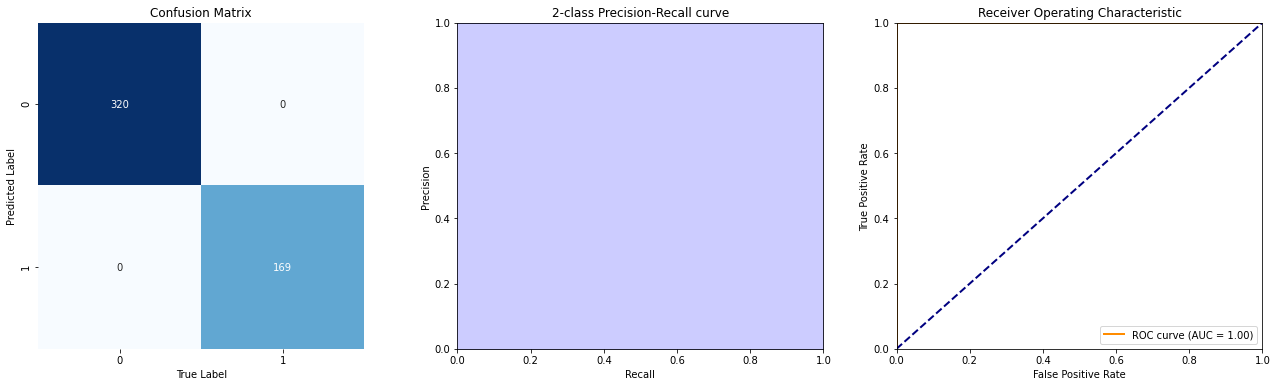


****************
* Bagging (DT) *
****************
Accuracy :  0.9918 [TP/N]           Proportion of predicted labels that match the true labels.
Precision : 0.9825 [TP / (TP + FP)] Not to label a false positive.
Recall :    0.9941 [TP / (TP + FN)] All of the positive samples.
ROC AUC :  0.9997                   How well the model learns.


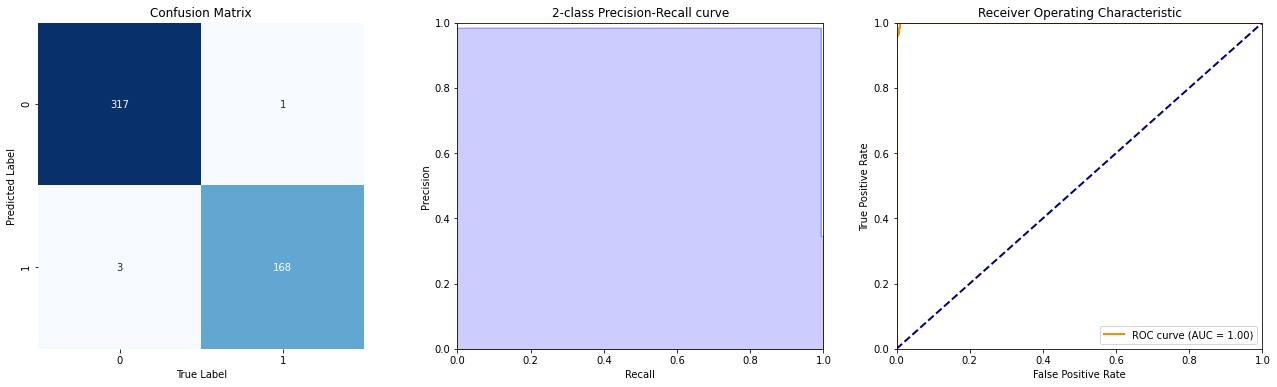

In [24]:
# Keep the results in a dataframe
results = pd.DataFrame(columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'ROC_AUC'])

models = ['Decision Tree', 'Bagging (DT)']
for i, m in enumerate([dtclf, abclf]):
    print('*' * (len(models[i]) + 4))
    print('* %s *' % models[i])
    print('*' * (len(models[i]) + 4))
    predictions = m.predict(X_train)
    probabilities = m.predict_proba(X_train)
    # show the report
    accuracy_, precision_, recall_, roc_auc_ = show_summary_report(y_train, predictions, probabilities)
    # keep the results
    results.loc[i] = {'Model': models[i], 
                      'Accuracy': accuracy_, 
                      'Precision': precision_,
                      'Recall': recall_,
                      'ROC_AUC': roc_auc_}
    print()

# Step 10: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [25]:
results

,Model,Accuracy,Precision,Recall,ROC_AUC
0,Decision Tree,1.00000,1.000000,1.000000,1.000000
1,Bagging (DT),0.99182,0.982456,0.994083,0.999704


# Step 11: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

In [29]:
r = data.iloc[X_test.index[0]]
for i, c in enumerate(data.columns[:-1]):
    print('%-27s: %d' % (c, int(r[i])))
print('%-27s: %s' % (data.columns[-1], 'Benign' if r[-1] == 2 else 'Malignant'))
print('%-27s: %s' % ('Prediction', 'Benign' if predictions[0] == 0 else 'Malignant'))

Clump Thickness            : 2
Uniformity of Cell Size    : 1
Uniformity of Cell Shape   : 1
Marginal Adhesion          : 2
Single Epithelial Cell Size: 3
Bare Nuclei                : 1
Bland Chromatin            : 2
Normal Nucleoli            : 1
Mitoses                    : 1
Class                      : Benign
Prediction                 : Benign




---



---



> > > > > > > > > © 2021 Institute of Data


---



---



